# Final Year Project 2021<a href="#Final-Year-Project-2021" class="anchor-link">¶</a>

### Dataset : This project will utilize a dataset distributed by : <https://doi.org/10.34973/qqr5-9s48><a href="#Dataset-:--This-project-will-utilize-a-dataset-distributed-by-:-https://doi.org/10.34973/qqr5-9s48" class="anchor-link">¶</a>

In This dataset two experimental tasks were employed using
individualized rewards and their subjective values to study ***(1)
passive avoidance and reversal learning (PasRev dataset) and (2) risky
decision making (WoF dataset) in offenders with and without psychopathy,
as well as healthy controls***. The results showed that sufficient
subjective value of reward facilitates acquisition but not response
reversal in psychopathic offenders.

***They did find psychopathic offenders to be guided more by pay-off
sizes than probabilities. They did not find any effects of subjective
reward value on overall risky decision making. These findings suggest
that specific reinforcement learning impairments often found in
individuals with psychopathy can be reduced with the use of personalized
rewards.***

### In this project we trained a model which will predict Healthy controls, non-psychopathic offenders and psychopathic offenders by analyzing the existing dataset.<a href="#In-this-project-we-trained-a-model-which-will-predict-Healthy-controls,-non-psychopathic-offenders-and-psychopathic-offenders-by-analyzing-the-existing-dataset." class="anchor-link">¶</a>

## 1. Import Libraries<a href="#1.-Import-Libraries" class="anchor-link">¶</a>

In \[1\]:

    #pip install keras

In \[2\]:

    #pip install tensorflow==2.2.0

In \[3\]:

    import sys
    import pandas as pd
    import numpy as np
    import sklearn
    import matplotlib
    import keras
    import seaborn as sns
    import tensorflow as tf

    import matplotlib.pyplot as plt
    %matplotlib inline

    from pandas.plotting import scatter_matrix

    print ('Python: {}'.format(sys.version))
    print ('Pandas: {}'.format(pd.__version__))
    print ('Numpy: {}'.format(np.__version__))
    print ('Sklearn: {}'.format(sklearn.__version__))
    print ('Matplotlib: {}'.format(matplotlib.__version__))
    print ('Keras: {}'.format(keras.__version__))
    print ('Tensorflow: {}'.format(tf.__version__))

    Python: 3.7.10 (default, Feb 26 2021, 18:47:35) 
    [GCC 7.3.0]
    Pandas: 1.0.5
    Numpy: 1.18.5
    Sklearn: 0.23.1
    Matplotlib: 3.2.2
    Keras: 2.4.3
    Tensorflow: 2.2.0

## 2. Dataset Loading<a href="#2.-Dataset-Loading" class="anchor-link">¶</a>

### I. Risky decision making (WoF dataset)<a href="#I.-Risky-decision-making-(WoF-dataset)" class="anchor-link">¶</a>

In \[4\]:

    import io
    import os, types
    import pandas as pd
    from botocore.client import Config
    import ibm_boto3

    def __iter__(self): return 0

    # @hidden_cell
    # The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
    # You might want to remove those credentials before you share the notebook.

    if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
        endpoint_91eebe99af9149ecabdf33325a3f33dd = 'https://s3.us.cloud-object-storage.appdomain.cloud'
    else:
        endpoint_91eebe99af9149ecabdf33325a3f33dd = 'https://s3.us.cloud-object-storage.appdomain.cloud'

    client_91eebe99af9149ecabdf33325a3f33dd = ibm_boto3.client(service_name='s3',
        ibm_api_key_id='7VtkP0vgO6_OZ9qCyMnBVfAgZTB4e5mU57YMIVL1NnQG',
        ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
        config=Config(signature_version='oauth'),
        endpoint_url=endpoint_91eebe99af9149ecabdf33325a3f33dd)

    body = client_91eebe99af9149ecabdf33325a3f33dd.get_object(Bucket='assignmentmachinelearning-donotdelete-pr-vk52ui2felqsnh',
                                                              Key='Behavioural data WoF_total.xlsx')['Body']
    # add missing __iter__ method, so pandas accepts body as file-like object
    if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

    wof = pd.read_excel(io.BytesIO(body.read()))
    # wof_1= pd.read_excel(io.BytesIO(body.read()),'Explanation of variables')
    wof.head(5)

Out\[4\]:

|     | PPN   | Group | PCL_R\_Total | PCL_R\_F1 | PCL_R\_F2 | Age | IQ     | WAIS_INF_Scaled | WAIS_SSC_Scaled | Educ_Level | ... | GambleRatio_plus0_FRAME_HR | GambleRatio_plus5_HR | GambleRatio_plus10_HR | GambleRatio_plus40_HR | GambleRatio_plus55_HR | GambleRatio_aftr_LargeLoss_HR | GambleRatio_aftr_SmallLoss_HR | GambleRatio\_\_aftr_LargeGain_HR | GambleRatio\_\_aftr_SmallGain_HR | WoF_ScoreTotal_HR |
|-----|-------|-------|--------------|-----------|-----------|-----|--------|-----------------|-----------------|------------|-----|----------------------------|----------------------|-----------------------|-----------------------|-----------------------|-------------------------------|-------------------------------|----------------------------------|----------------------------------|-------------------|
| 0   | C1701 | 0     | NaN          | NaN       | NaN       | 47  | 93.70  | 9.0             | 9.0             | 5.0        | ... | 0.00                       | 0.0                  | 100.0                 | 100.00                | 100.00                | 0.80                          | 1.00                          | 0.50                             | 0.11                             | 545.0             |
| 1   | C1702 | 0     | NaN          | NaN       | NaN       | 43  | 84.25  | 10.0            | 5.0             | 5.0        | ... | 83.33                      | 0.0                  | 100.0                 | 100.00                | 100.00                | 0.50                          | 0.00                          | 0.50                             | 0.42                             | 785.0             |
| 2   | C1703 | 0     | NaN          | NaN       | NaN       | 52  | 77.95  | 8.0             | 5.0             | 5.0        | ... | 16.67                      | 0.0                  | 100.0                 | 100.00                | 100.00                | 0.40                          | 0.75                          | 0.57                             | 0.44                             | 365.0             |
| 3   | C1704 | 0     | NaN          | NaN       | NaN       | 58  | 115.75 | 15.0            | 10.0            | 6.0        | ... | 33.33                      | 50.0                 | 100.0                 | 83.33                 | 83.33                 | 0.75                          | 0.00                          | 0.22                             | 0.29                             | 565.0             |
| 4   | C1705 | 0     | NaN          | NaN       | NaN       | 44  | 112.60 | 11.0            | 13.0            | 5.0        | ... | 0.00                       | 0.0                  | 100.0                 | 100.00                | 100.00                | 0.00                          | 0.50                          | 0.50                             | 0.75                             | 645.0             |

5 rows × 63 columns

### II. Passive avoidance and reversal learning (PasRev dataset)<a href="#II.-Passive-avoidance-and-reversal-learning-(PasRev-dataset)" class="anchor-link">¶</a>

In \[5\]:

    body = client_91eebe99af9149ecabdf33325a3f33dd.get_object(Bucket='assignmentmachinelearning-donotdelete-pr-vk52ui2felqsnh',Key='Behavioural data PasRev_total.xlsx')['Body']
    # add missing __iter__ method, so pandas accepts body as file-like object
    if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

    pasrev = pd.read_excel(io.BytesIO(body.read()))
    # pasrev_1 = pd.read_excel(io.BytesIO(body.read()),'Explanation of variables')
    pasrev.head(5)

Out\[5\]:

|     | PPN   | Group | PCL_R\_Total | PCL_R\_F1 | PCL_R\_F2 | IQ     | Age | Order_Rewards | Order_Tasks | Session_NR | ... | WinStayPerc_Total_HR | WinStayPerc_Acq_HR | WinStayPerc_Rev_HR | LoseShiftPerc_Total_HR | LoseShiftPerc_Acq_HR | LoseShiftPerc_Rev_HR | Points_total_HR | WAIS_INF_Scaled | WAIS_SSC_Scaled | Educ_Level |
|-----|-------|-------|--------------|-----------|-----------|--------|-----|---------------|-------------|------------|-----|----------------------|--------------------|--------------------|------------------------|----------------------|----------------------|-----------------|-----------------|-----------------|------------|
| 0   | C1701 | 0     | NaN          | NaN       | NaN       | 93.70  | 47  | 1             | 1           | 1          | ... | 98.92                | 100.00             | 100.00             | 44.83                  | 47.06                | 41.67                | 1625            | 9.0             | 9.0             | 5.0        |
| 1   | C1702 | 0     | NaN          | NaN       | NaN       | 84.25  | 43  | 3             | 2           | 2          | ... | 97.09                | 95.45              | 100.00             | 34.18                  | 35.29                | 32.14                | 600             | 10.0            | 5.0             | 5.0        |
| 2   | C1703 | 0     | NaN          | NaN       | NaN       | 77.95  | 52  | 2             | 1           | 3          | ... | 95.24                | 96.43              | 92.86              | 57.50                  | 57.14                | 57.89                | 1150            | 8.0             | 5.0             | 5.0        |
| 3   | C1704 | 0     | NaN          | NaN       | NaN       | 115.75 | 58  | 1             | 2           | 1          | ... | 90.53                | 96.92              | 79.31              | 36.54                  | 52.94                | 5.56                 | 800             | 15.0            | 10.0            | 6.0        |
| 4   | C1705 | 0     | NaN          | NaN       | NaN       | 112.60 | 44  | 3             | 1           | 2          | ... | 95.28                | 94.12              | 97.37              | 26.67                  | 26.67                | 26.67                | 500             | 11.0            | 13.0            | 5.0        |

5 rows × 210 columns

## For WoF<a href="#For-WoF" class="anchor-link">¶</a>

## 3. Data Quality Assessment & Cleansing<a href="#3.-Data-Quality-Assessment-&amp;-Cleansing" class="anchor-link">¶</a>

In \[6\]:

    wof.shape 

Out\[6\]:

    (55, 63)

In \[7\]:

    wof.info() #datatype information

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 55 entries, 0 to 54
    Data columns (total 63 columns):
     #   Column                          Non-Null Count  Dtype  
    ---  ------                          --------------  -----  
     0   PPN                             55 non-null     object 
     1   Group                           55 non-null     int64  
     2   PCL_R_Total                     36 non-null     float64
     3   PCL_R_F1                        31 non-null     float64
     4   PCL_R_F2                        31 non-null     float64
     5   Age                             55 non-null     int64  
     6   IQ                              54 non-null     float64
     7   WAIS_INF_Scaled                 54 non-null     float64
     8   WAIS_SSC_Scaled                 54 non-null     float64
     9   Educ_Level                      54 non-null     float64
     10  Order_Rewards                   55 non-null     int64  
     11  Order_Tasks                     55 non-null     int64  
     12  Session_NR                      55 non-null     int64  
     13  Reward_value_NR                 55 non-null     int64  
     14  GambleRatio_min55_NR            55 non-null     float64
     15  GambleRatio_min40_NR            55 non-null     float64
     16  GambleRatio_min10_NR            55 non-null     float64
     17  GambleRatio_min5_NR             55 non-null     float64
     18  GambleRatio_min0_FRAME_NR       55 non-null     float64
     19  GambleRatio_plus0_FRAME_NR      55 non-null     float64
     20  GambleRatio_plus5_NR            55 non-null     float64
     21  GambleRatio_plus10_NR           55 non-null     float64
     22  GambleRatio_plus40_NR           55 non-null     float64
     23  GambleRatio_plus55_NR           55 non-null     float64
     24  GambleRatio_aftr_LargeLoss_NR   55 non-null     float64
     25  GambleRatio_aftr_SmallLoss_NR   55 non-null     float64
     26  GambleRatio__aftr_LargeGain_NR  55 non-null     float64
     27  GambleRatio__aftr_SmallGain_NR  55 non-null     float64
     28  WoF_ScoreTotal_NR               55 non-null     int64  
     29  Reward_value_LR                 54 non-null     float64
     30  Session_LR                      55 non-null     int64  
     31  GambleRatio_min55_LR            55 non-null     float64
     32  GambleRatio_min40_LR            55 non-null     float64
     33  GambleRatio_min10_LR            55 non-null     float64
     34  GambleRatio_min5_LR             55 non-null     float64
     35  GambleRatio_min0_FRAME_LR       55 non-null     float64
     36  GambleRatio_plus0_FRAME_LR      55 non-null     float64
     37  GambleRatio_plus5_LR            55 non-null     float64
     38  GambleRatio_plus10_LR           55 non-null     float64
     39  GambleRatio_plus40_LR           55 non-null     float64
     40  GambleRatio_plus55_LR           55 non-null     float64
     41  GambleRatio_aftr_LargeLoss_LR   55 non-null     float64
     42  GambleRatio_aftr_SmallLoss_LR   55 non-null     float64
     43  GambleRatio__aftr_LargeGain_LR  55 non-null     float64
     44  GambleRatio__aftr_SmallGain_LR  55 non-null     float64
     45  WoF_ScoreTotal_LR               55 non-null     int64  
     46  Reward_value_HR                 55 non-null     float64
     47  Session_HR                      55 non-null     int64  
     48  GambleRatio_min55_HR            55 non-null     float64
     49  GambleRatio_min40_HR            55 non-null     float64
     50  GambleRatio_min10_HR            55 non-null     float64
     51  GambleRatio_min5_HR             55 non-null     float64
     52  GambleRatio_min0_FRAME_HR       55 non-null     float64
     53  GambleRatio_plus0_FRAME_HR      55 non-null     float64
     54  GambleRatio_plus5_HR            55 non-null     float64
     55  GambleRatio_plus10_HR           55 non-null     float64
     56  GambleRatio_plus40_HR           55 non-null     float64
     57  GambleRatio_plus55_HR           55 non-null     float64
     58  GambleRatio_aftr_LargeLoss_HR   55 non-null     float64
     59  GambleRatio_aftr_SmallLoss_HR   55 non-null     float64
     60  GambleRatio__aftr_LargeGain_HR  55 non-null     float64
     61  GambleRatio__aftr_SmallGain_HR  55 non-null     float64
     62  WoF_ScoreTotal_HR               54 non-null     float64
    dtypes: float64(52), int64(10), object(1)
    memory usage: 27.2+ KB

In \[8\]:

    pdat=wof
    pdata=pdat.drop(columns=['PPN','Reward_value_NR'])

In \[9\]:

    # all null values
    pdata.isnull().sum()

Out\[9\]:

    Group                              0
    PCL_R_Total                       19
    PCL_R_F1                          24
    PCL_R_F2                          24
    Age                                0
                                      ..
    GambleRatio_aftr_LargeLoss_HR      0
    GambleRatio_aftr_SmallLoss_HR      0
    GambleRatio__aftr_LargeGain_HR     0
    GambleRatio__aftr_SmallGain_HR     0
    WoF_ScoreTotal_HR                  1
    Length: 61, dtype: int64

In \[10\]:

    pdata=pdata.fillna(0)
    # null value
    pdata.isnull().sum()

Out\[10\]:

    Group                             0
    PCL_R_Total                       0
    PCL_R_F1                          0
    PCL_R_F2                          0
    Age                               0
                                     ..
    GambleRatio_aftr_LargeLoss_HR     0
    GambleRatio_aftr_SmallLoss_HR     0
    GambleRatio__aftr_LargeGain_HR    0
    GambleRatio__aftr_SmallGain_HR    0
    WoF_ScoreTotal_HR                 0
    Length: 61, dtype: int64

****No Null value present now****

## 4. Data Visualization<a href="#4.-Data-Visualization" class="anchor-link">¶</a>

In \[11\]:

    var1 = pdata[["PCL_R_Total","Age","IQ","Session_NR","WoF_ScoreTotal_NR","Reward_value_LR","Session_LR",
                  "WoF_ScoreTotal_LR","Reward_value_HR","Session_HR","WoF_ScoreTotal_HR"]]
    for col1 in var1:
        plt.figure(figsize=(7,7))
        a=pdata[col1].value_counts().plot.box()
        plt.xticks(rotation=60)
        plt.show()

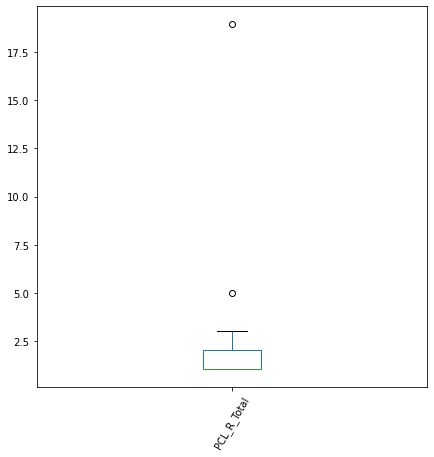

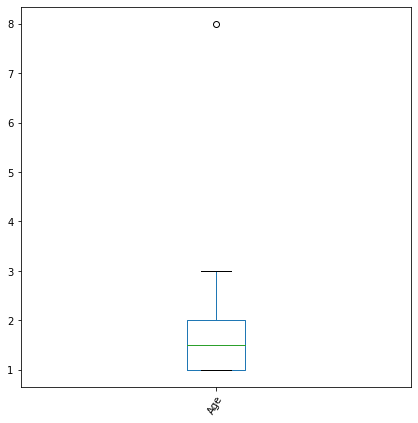

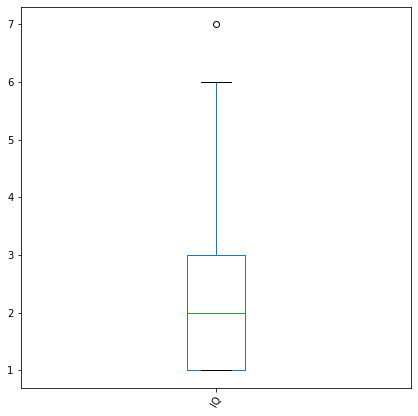

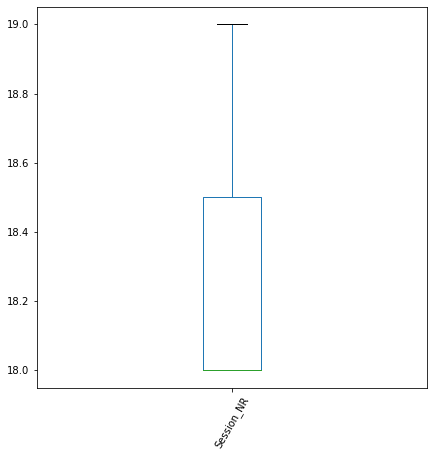

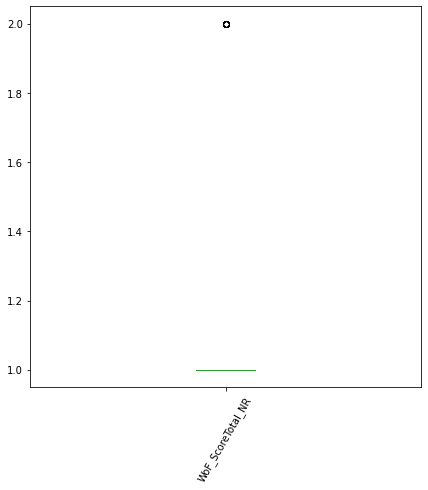

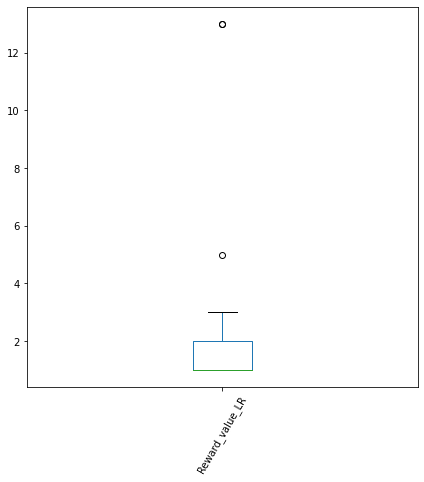

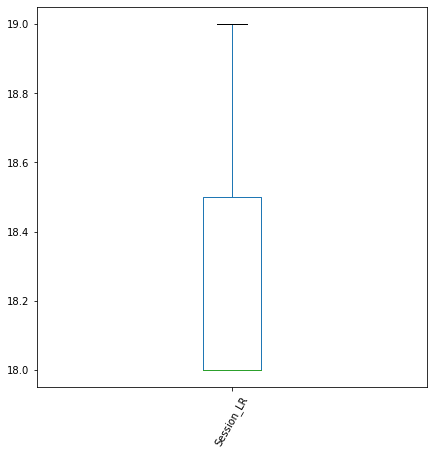

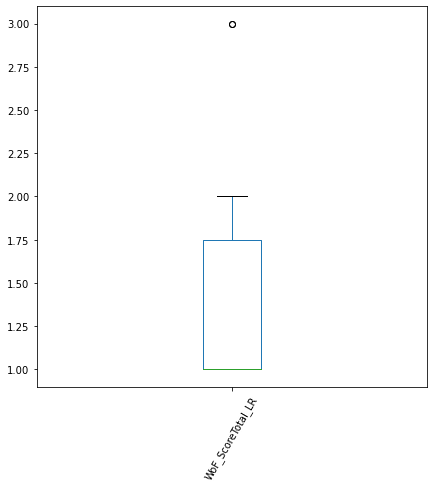

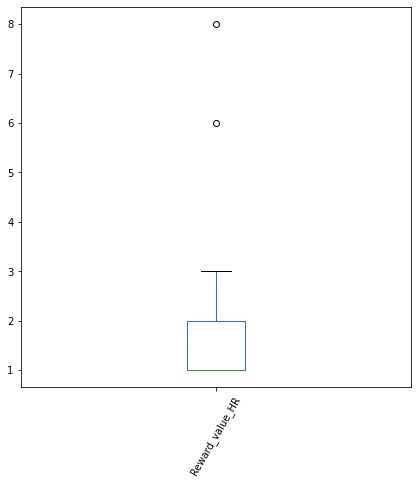

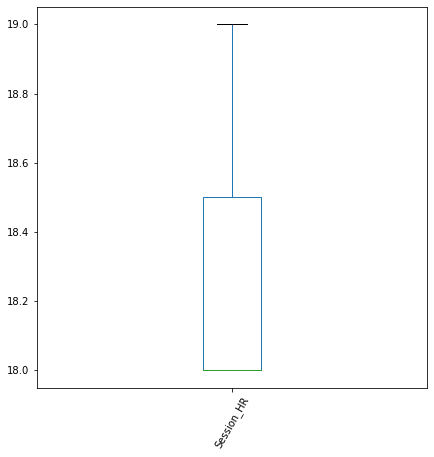

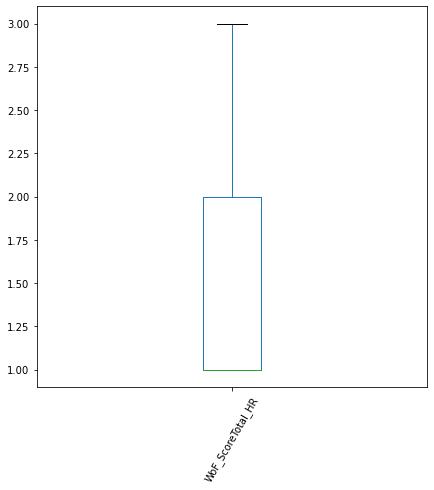

In \[12\]:

    # plotting the bar plot of Group (Target Class)
    ax=pdata["Group"].value_counts().plot.bar(color=('y','c'),figsize=(8,8))
    plt.xlabel("Group", labelpad=15)
    plt.ylabel("Count", labelpad=15)
    plt.title("Target Class", y=1.02);
    for p in ax.patches:
        ax.annotate(np.round(p.get_height(),decimals=2),
                    (p.get_x()+p.get_width()/2., p.get_height()),ha='center',va='center',
                    xytext=(0, 10),textcoords='offset points')
        

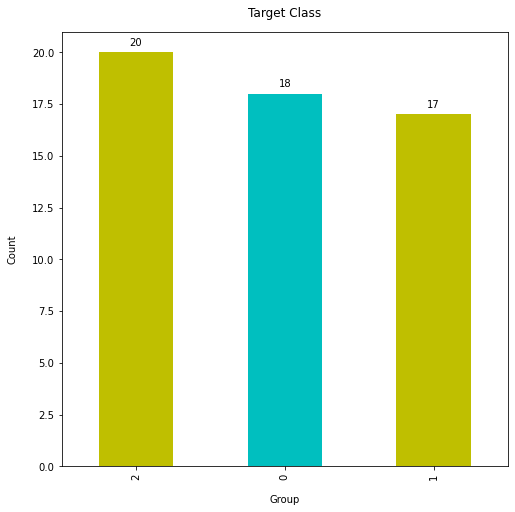

In \[13\]:

    ###comment due

In \[14\]:

    from pandas.plotting import radviz

    var2= pdata[["Group","PCL_R_Total","Age","IQ","Session_NR","WoF_ScoreTotal_NR","Reward_value_LR","Session_LR",
                  "WoF_ScoreTotal_LR","Reward_value_HR","Session_HR","WoF_ScoreTotal_HR"]]
    g1=var2.iloc[:17,:]
    g2= var2.iloc[18:34,:]
    g3= var2.iloc[35:55,:]
    def rad_viz(df,Group):
        plt.figure(figsize=(10,10))
        fig = radviz(df, Group, color=sns.color_palette())
        plt.show()
    print("Healthy Controls :")
    rad_viz(g1,"Group")
    print("Non - Psychopathic Offenders :")
    rad_viz(g2,"Group")
    print("Psychopathic Offenders :")
    rad_viz(g3,"Group")
    print("All Group Combined :")
    rad_viz(var2,"Group")

    Healthy Controls :

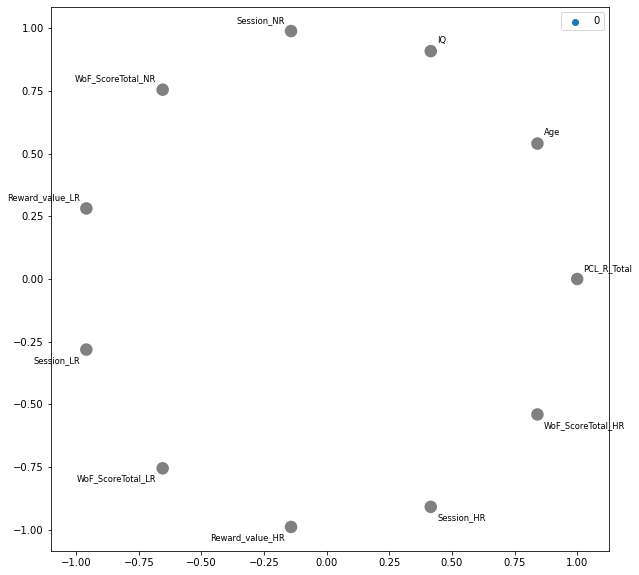

    Non - Psychopathic Offenders :

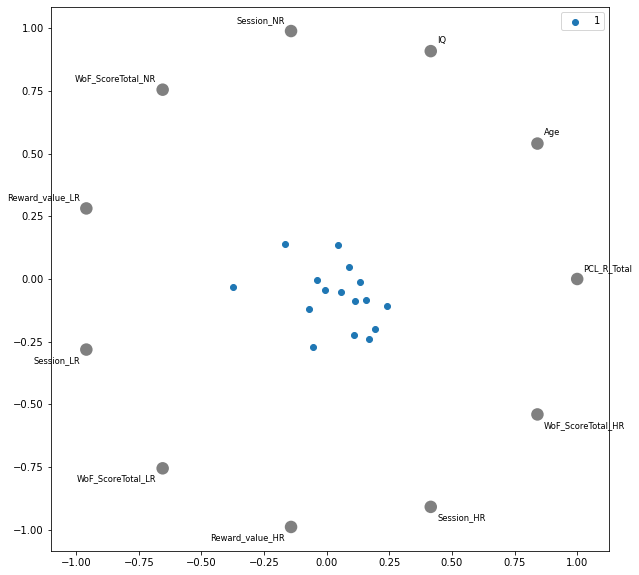

    Psychopathic Offenders :

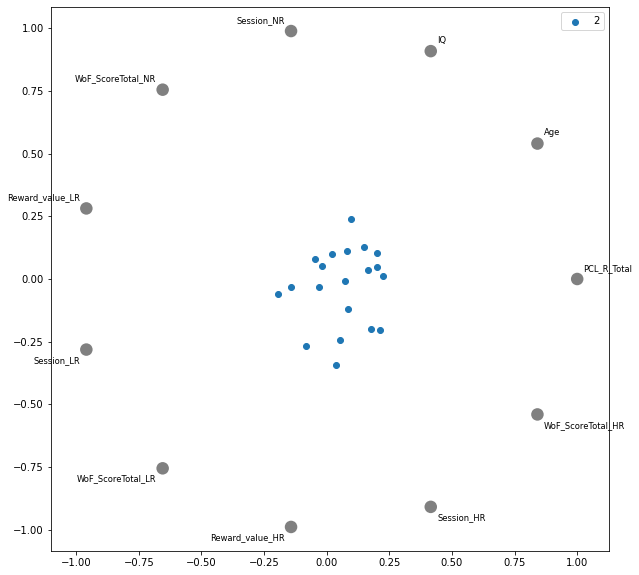

    All Group Combined :

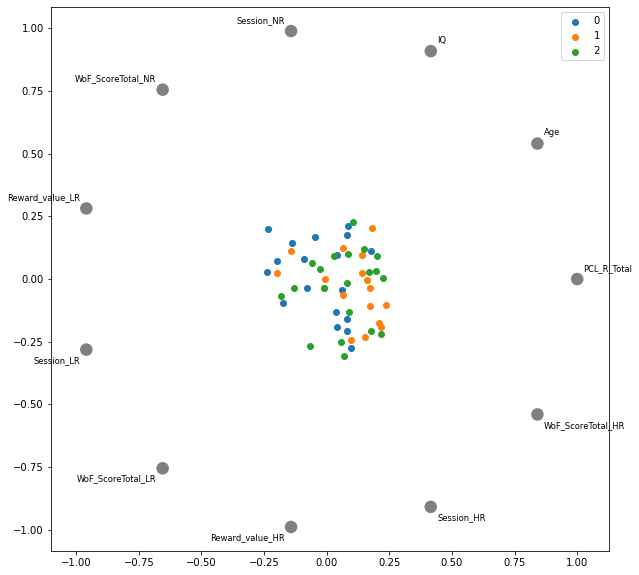

In \[15\]:

    ### Comment Due

In \[16\]:

    from pandas.plotting import parallel_coordinates
    def pcoord_viz(df, labels):
        plt.figure(figsize=(30,10))
        fig = parallel_coordinates(df, labels, color=sns.color_palette())
        plt.show()
    print("Healthy Controls :")
    pcoord_viz(g1,"Group")
    print("Non - Psychopathic Offenders :")
    pcoord_viz(g2,"Group")
    print("Psychopathic Offenders :")
    pcoord_viz(g3,"Group")
    print("All Group Combined :")
    pcoord_viz(var2,"Group")

    Healthy Controls :

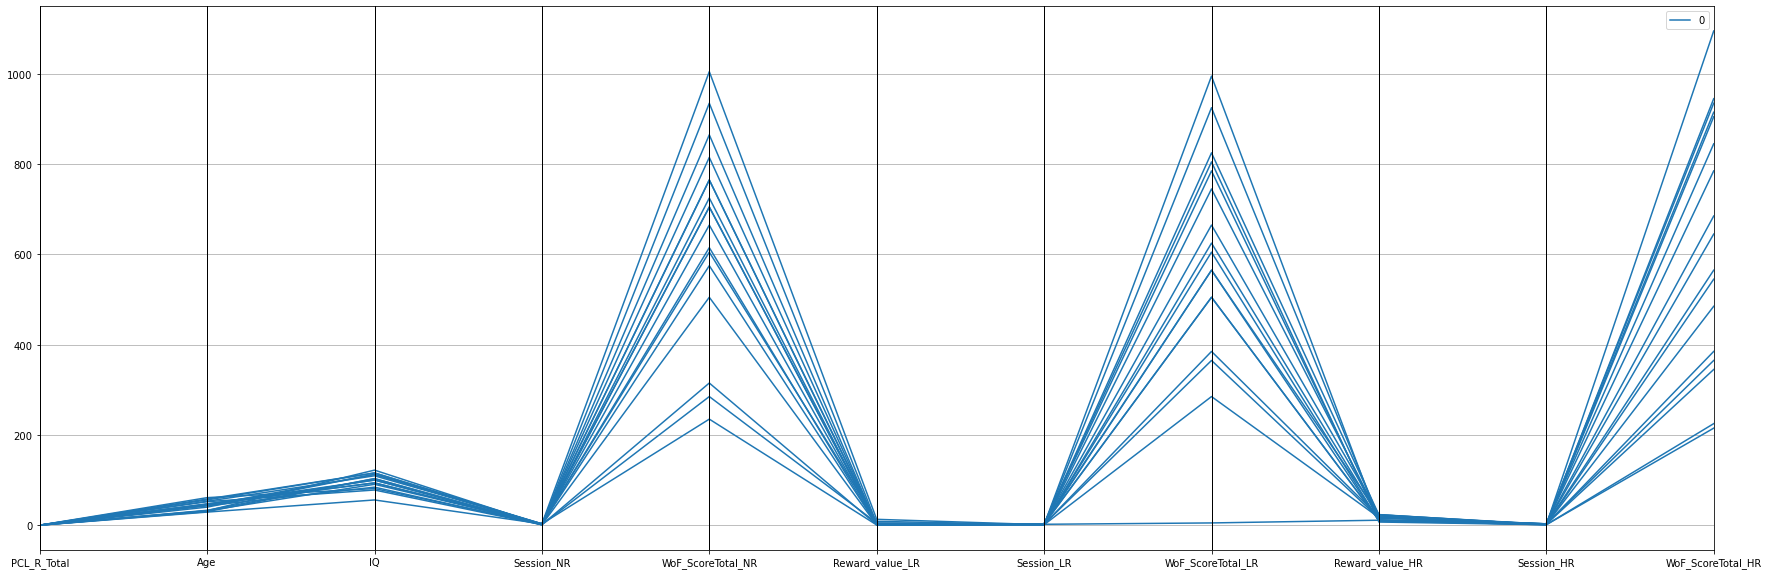

    Non - Psychopathic Offenders :

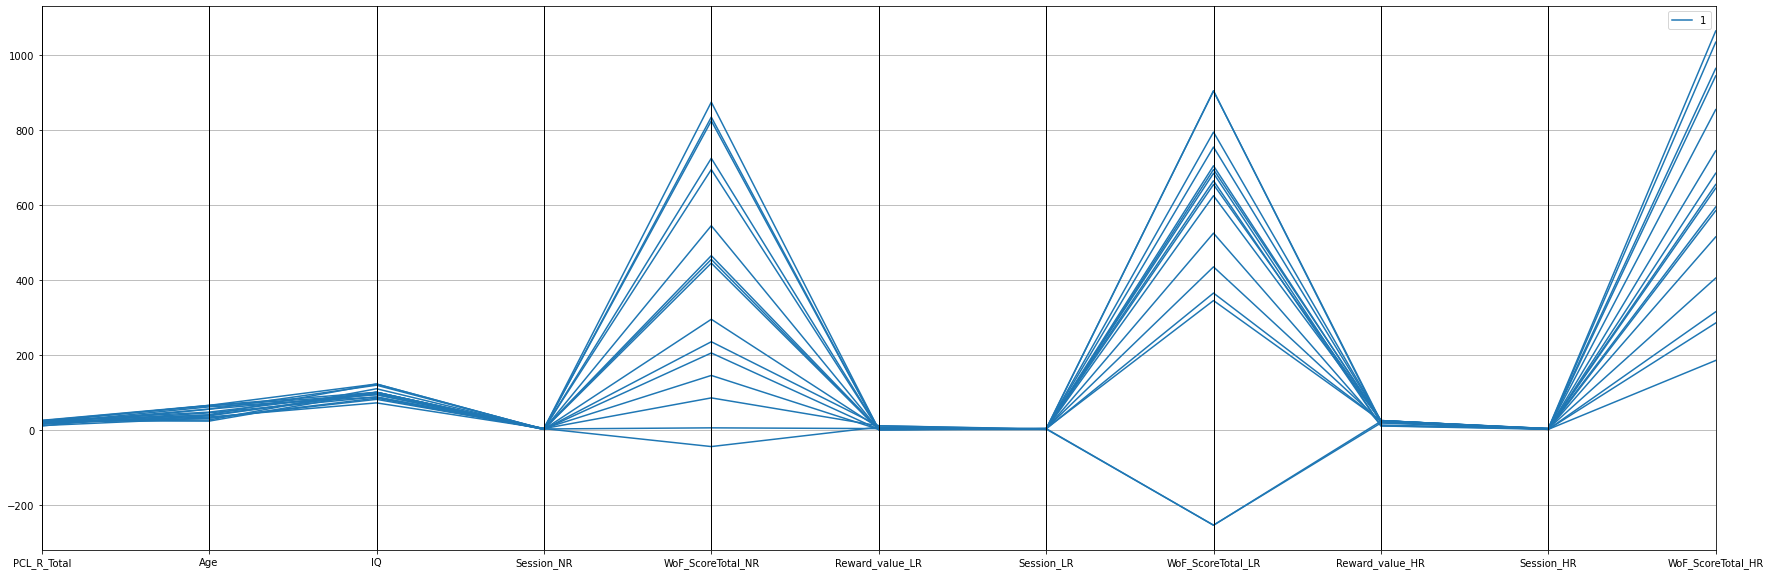

    Psychopathic Offenders :

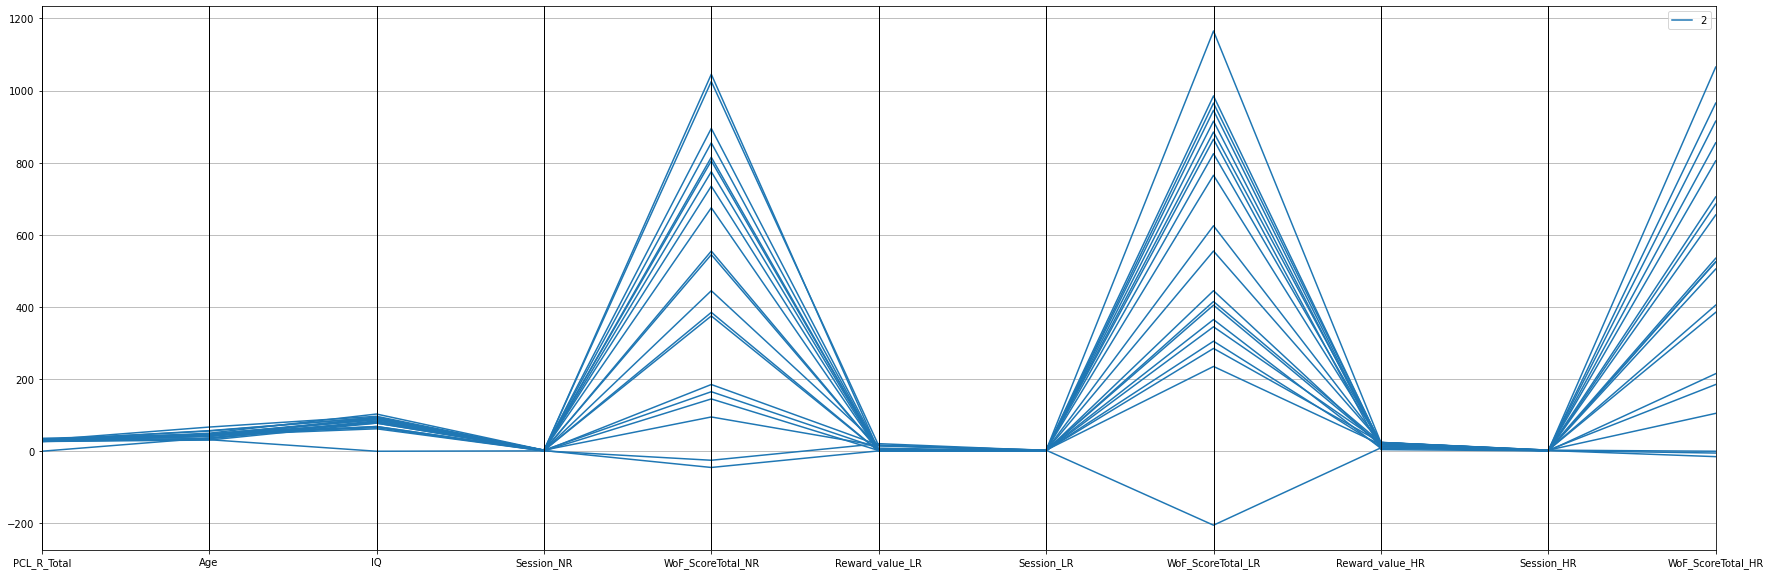

    All Group Combined :

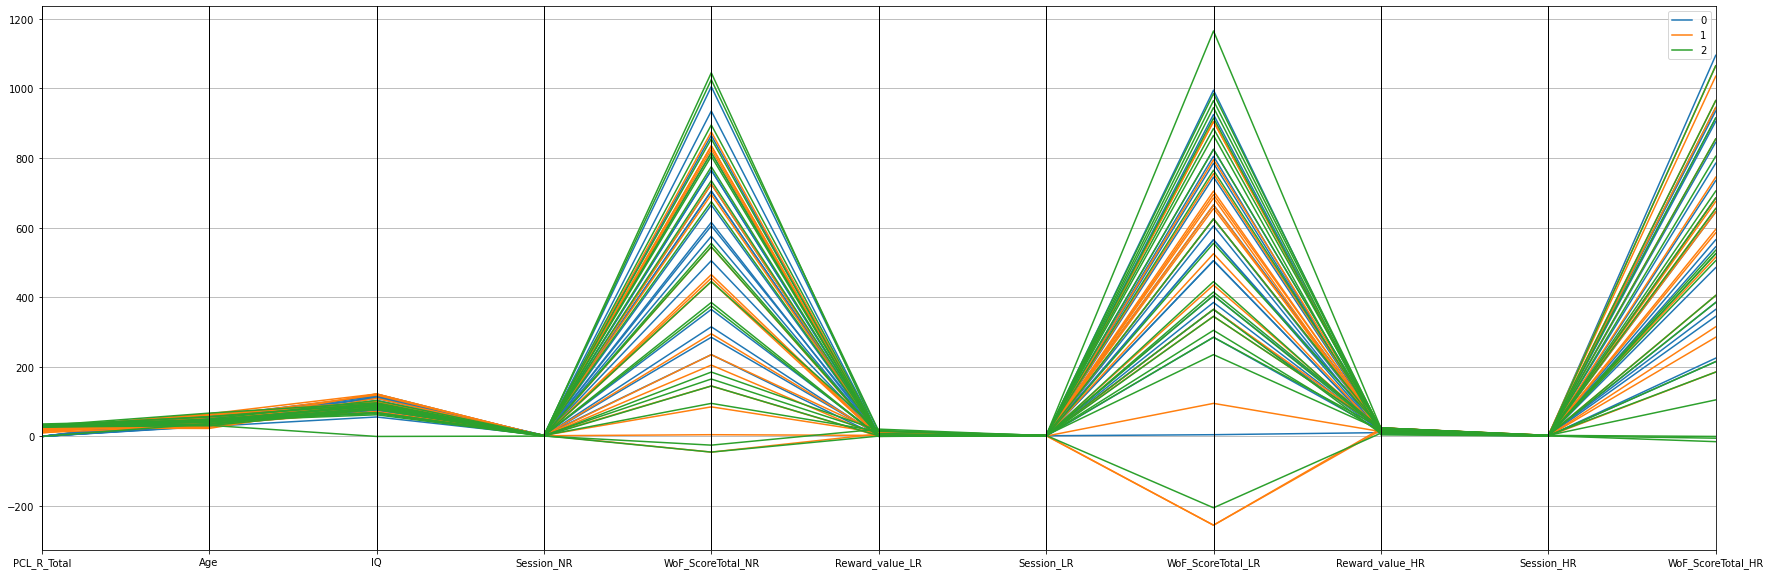

In \[17\]:

    ### Comment Due

In \[18\]:

    # seaborn's kdeplot, plots univariate or bivariate density estimates.
    #Size can be changed by tweeking the value used
    a1=sns.FacetGrid(pdata, hue="Group", height=5).map(sns.kdeplot, "IQ").add_legend()
    a2=sns.FacetGrid(pdata, hue="Group", height=5).map(sns.kdeplot, "PCL_R_Total").add_legend()
    a3=sns.FacetGrid(pdata, hue="Group", height=5).map(sns.kdeplot, "WoF_ScoreTotal_HR").add_legend()
    plt.show()

    /opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
      warnings.warn(msg, UserWarning)

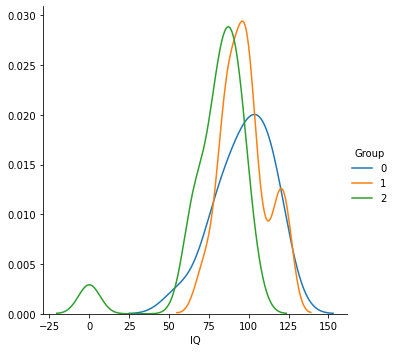

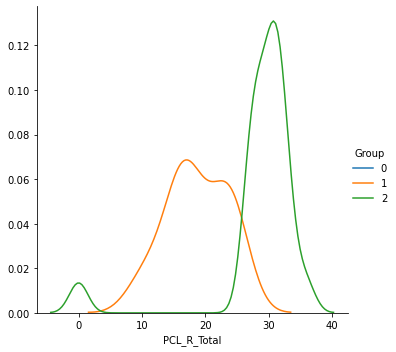

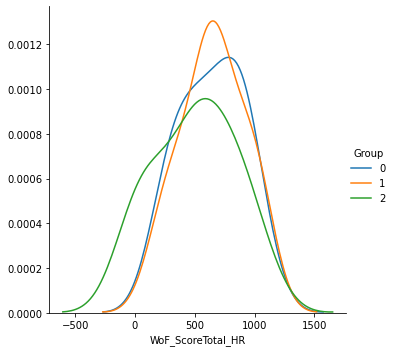

In \[19\]:

    ### Comment due

In \[20\]:

    # 2D scatter plot
    from mpl_toolkits import mplot3d

    x= pdata["Educ_Level"]
    y=pdata["IQ"]
    z=pdata["WoF_ScoreTotal_HR"]  ## Total score in the High reward condition
    g= pdata["Group"]

    fig = plt.figure(figsize = (16, 9))
    ax = plt.axes(projection ="3d")
    ax.grid(b = True, color ='grey',
            linestyle ='-', linewidth = 1,
            alpha = 0.2)
    sp1=ax.scatter3D(x,y,z, s=200, c=g, cmap=plt.cm.get_cmap("brg",5))

    cbar=fig.colorbar(sp1, orientation="vertical", extend="both", shrink = 0.6, aspect = 8)
    cbar.set_label(label="Group", size=15)


    plt.show()

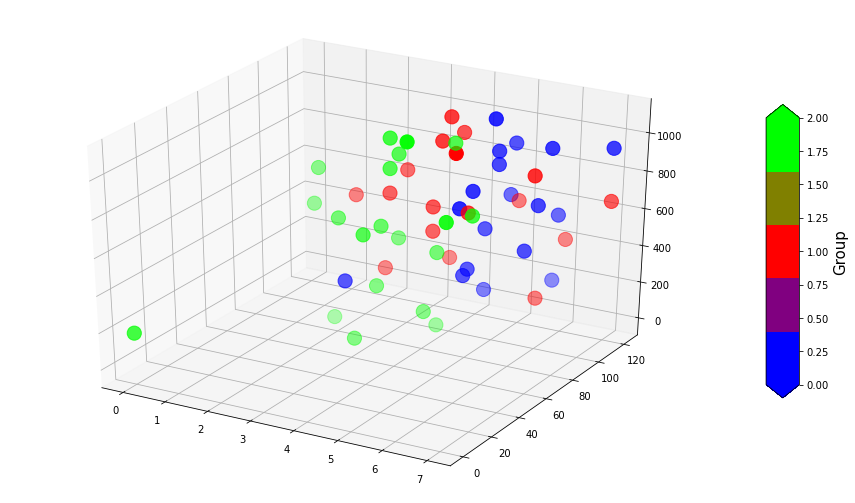

In \[21\]:

    ### Comment Due

In \[22\]:

    #plotting al the categorical values of the clients
    cat_var = ['Educ_Level',"Order_Rewards","Order_Tasks","Session_NR","Session_LR","Session_HR"]
    for col in cat_var:
        plt.figure(figsize=(7,7))
        ax=pdata[col].value_counts().plot.bar()
        plt.title(col,fontsize=18)
        plt.tight_layout()
        for p in ax.patches:
            ax.annotate(np.round(p.get_height(),decimals=2),
                        (p.get_x()+p.get_width()/2, p.get_height()),ha='center',va='center',
                        xytext=(0, 10),textcoords='offset points')

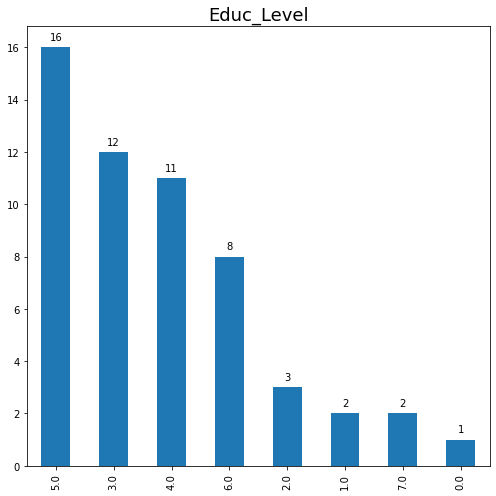

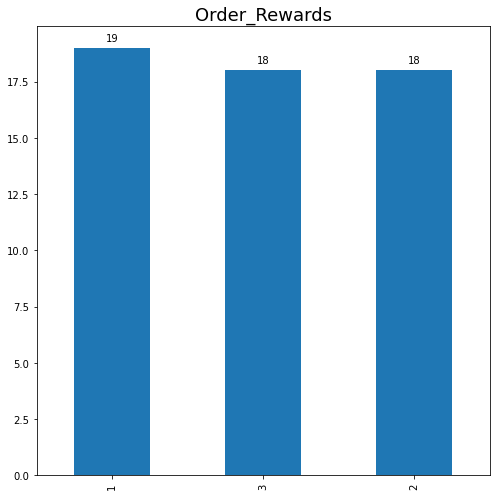

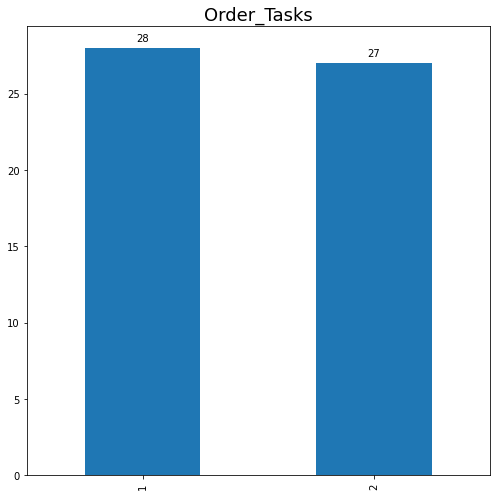

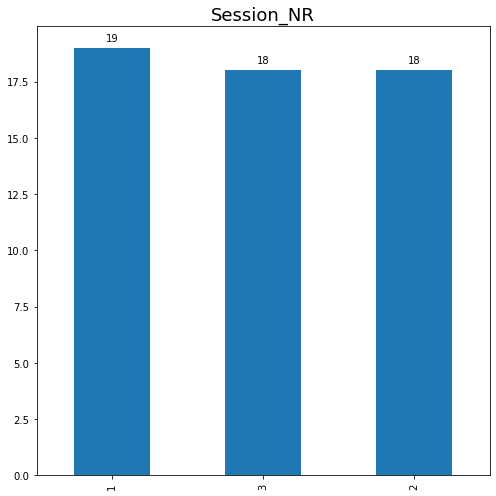

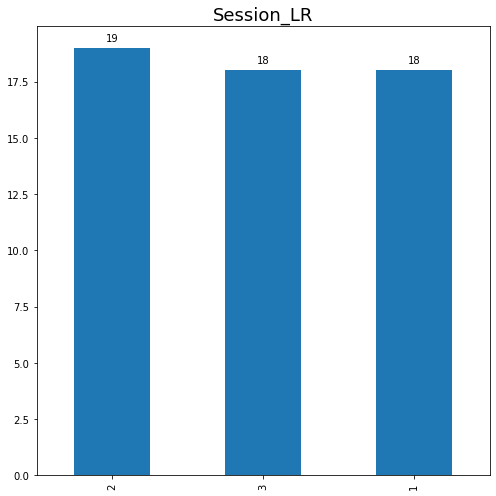

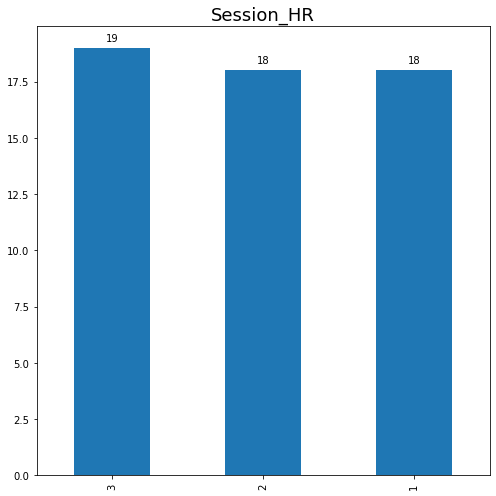

In \[23\]:

    ### Comment Due

In \[24\]:

    #subscription status in different domain in jobs
    print(pd.crosstab(pdata['Group'],pdata["Session_HR"]))
    Group=pd.crosstab(pdata['Group'],pdata['Session_HR'])
    Group.div(Group.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
    plt.xlabel('Group')
    plt.ylabel('Session_HR')

    Session_HR  1  2  3
    Group              
    0           6  6  6
    1           5  6  6
    2           7  6  7

Out\[24\]:

    Text(0, 0.5, 'Session_HR')

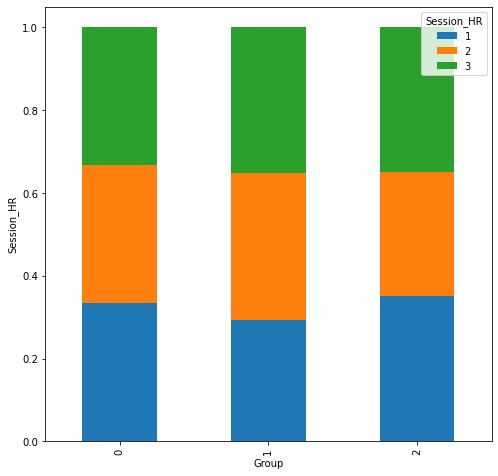

In \[25\]:

    ### comment due

In \[26\]:

    #subscription status in different domain in jobs
    print(pd.crosstab(pdata['Group'],pdata["Session_LR"]))
    Group=pd.crosstab(pdata['Group'],pdata['Session_LR'])
    Group.div(Group.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
    plt.xlabel('Group')
    plt.ylabel('Session_LR')

    Session_LR  1  2  3
    Group              
    0           6  6  6
    1           6  6  5
    2           6  7  7

Out\[26\]:

    Text(0, 0.5, 'Session_LR')

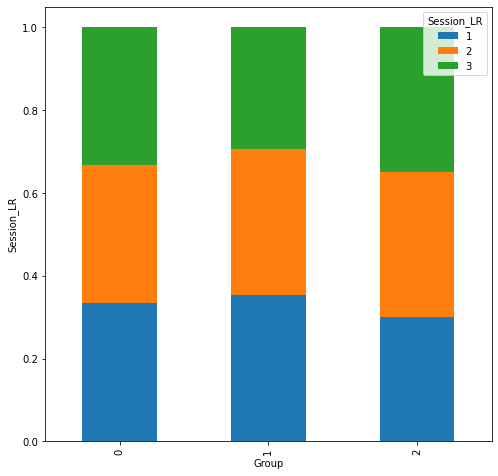

In \[27\]:

    ### comment due

In \[28\]:

    #subscription status in different domain in jobs
    print(pd.crosstab(pdata['Group'],pdata["Session_NR"]))
    Group=pd.crosstab(pdata['Group'],pdata['Session_NR'])
    Group.div(Group.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
    plt.xlabel('Group')
    plt.ylabel('Session_NR')

    Session_NR  1  2  3
    Group              
    0           6  6  6
    1           6  5  6
    2           7  7  6

Out\[28\]:

    Text(0, 0.5, 'Session_NR')

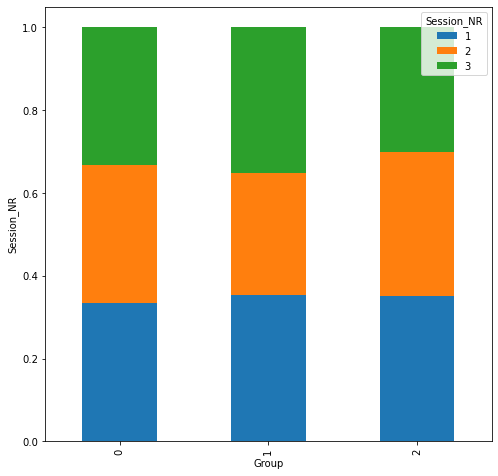

In \[29\]:

    ### Comment Due

In \[30\]:

    sns.set_style('whitegrid');
    sns.FacetGrid(pdata, hue='Group', height=8) \
    .map(plt.scatter, "Age", "PCL_R_Total") \
    .add_legend();
    plt.show()

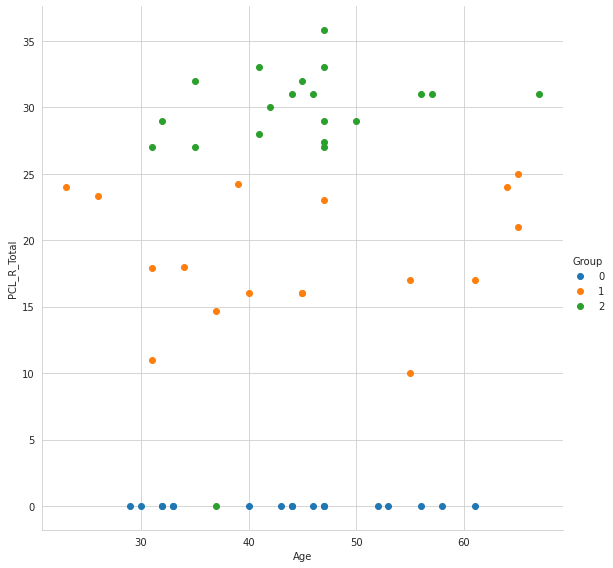

In \[31\]:

    ## comment due

In \[32\]:

    # Age vs Group
    plot = sns.FacetGrid(pdata, hue='Group',aspect=5)
    plot.map(sns.kdeplot,'Age', shade= True)
    plot.add_legend()

Out\[32\]:

    <seaborn.axisgrid.FacetGrid at 0x7f45d805bd10>

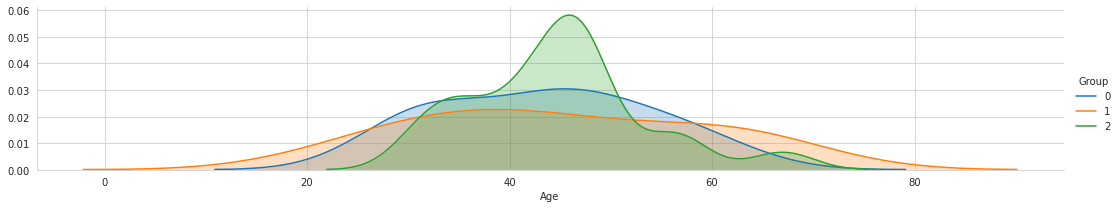

In \[33\]:

    ### comment due

In \[34\]:

    #pip install yellowbrick

In \[35\]:

    from yellowbrick.features import Rank2D
    fig, ax2 = plt.subplots( figsize=(12, 12))
    vzr = Rank2D(ax=ax2)
    vzr.fit(var2)
    vzr.transform(var2)
    sns.despine(left=True, bottom=True)
    vzr.poof()

    findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
    findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.

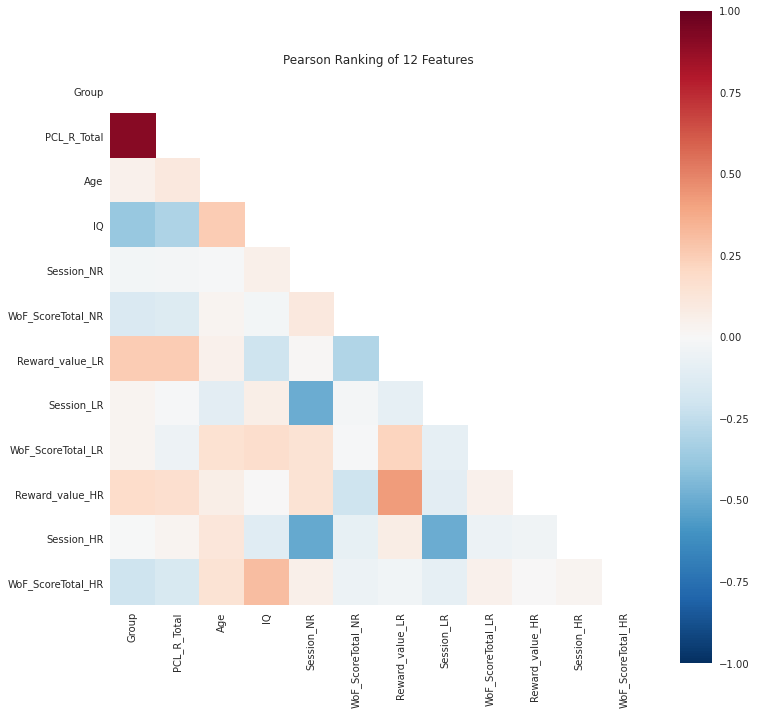

Out\[35\]:

    <matplotlib.axes._subplots.AxesSubplot at 0x7f45d8639a90>

## 5. Feature Engineering<a href="#5.-Feature-Engineering" class="anchor-link">¶</a>

In \[36\]:

    pdata.describe()   #calculate some statistical data like percentile, mean and std of the numerical values for each features

Out\[36\]:

|       | Group     | PCL_R\_Total | PCL_R\_F1 | PCL_R\_F2 | Age       | IQ         | WAIS_INF_Scaled | WAIS_SSC_Scaled | Educ_Level | Order_Rewards | ... | GambleRatio_plus0_FRAME_HR | GambleRatio_plus5_HR | GambleRatio_plus10_HR | GambleRatio_plus40_HR | GambleRatio_plus55_HR | GambleRatio_aftr_LargeLoss_HR | GambleRatio_aftr_SmallLoss_HR | GambleRatio\_\_aftr_LargeGain_HR | GambleRatio\_\_aftr_SmallGain_HR | WoF_ScoreTotal_HR |
|-------|-----------|--------------|-----------|-----------|-----------|------------|-----------------|-----------------|------------|---------------|-----|----------------------------|----------------------|-----------------------|-----------------------|-----------------------|-------------------------------|-------------------------------|----------------------------------|----------------------------------|-------------------|
| count | 55.000000 | 55.000000    | 55.000000 | 55.000000 | 55.000000 | 55.000000  | 55.000000       | 55.000000       | 55.000000  | 55.000000     | ... | 55.000000                  | 55.000000            | 55.000000             | 55.000000             | 55.000000             | 55.000000                     | 55.000000                     | 55.000000                        | 55.000000                        | 55.000000         |
| mean  | 1.036364  | 16.223636    | 6.200000  | 5.700000  | 44.309091 | 90.679091  | 9.000000        | 8.254545        | 4.181818   | 1.981818      | ... | 36.666182                  | 32.727818            | 95.151455             | 94.241818             | 96.969273             | 0.563091                      | 0.535818                      | 0.490364                         | 0.534000                         | 596.181818        |
| std   | 0.838067  | 13.112109    | 6.074842  | 6.079961  | 10.843794 | 19.909626  | 3.437269        | 2.995170        | 1.504203   | 0.827556      | ... | 29.813225                  | 31.420601            | 11.418016             | 13.691220             | 7.237772              | 0.281115                      | 0.355594                      | 0.175531                         | 0.220711                         | 297.444305        |
| min   | 0.000000  | 0.000000     | 0.000000  | 0.000000  | 23.000000 | 0.000000   | 0.000000        | 0.000000        | 0.000000   | 1.000000      | ... | 0.000000                   | 0.000000             | 50.000000             | 33.330000             | 66.670000             | 0.000000                      | 0.000000                      | 0.000000                         | 0.110000                         | -15.000000        |
| 25%   | 0.000000  | 0.000000     | 0.000000  | 0.000000  | 35.000000 | 81.100000  | 7.500000        | 6.000000        | 3.000000   | 1.000000      | ... | 16.670000                  | 0.000000             | 100.000000            | 100.000000            | 100.000000            | 0.400000                      | 0.330000                      | 0.410000                         | 0.330000                         | 385.000000        |
| 50%   | 1.000000  | 17.900000    | 8.000000  | 4.000000  | 45.000000 | 93.700000  | 9.000000        | 8.000000        | 4.000000   | 2.000000      | ... | 33.330000                  | 16.670000            | 100.000000            | 100.000000            | 100.000000            | 0.600000                      | 0.500000                      | 0.500000                         | 0.500000                         | 645.000000        |
| 75%   | 2.000000  | 28.500000    | 12.000000 | 12.500000 | 51.000000 | 100.000000 | 11.000000       | 10.000000       | 5.000000   | 3.000000      | ... | 50.000000                  | 58.335000            | 100.000000            | 100.000000            | 100.000000            | 0.765000                      | 0.845000                      | 0.570000                         | 0.730000                         | 850.000000        |
| max   | 2.000000  | 35.800000    | 18.000000 | 16.000000 | 67.000000 | 122.050000 | 17.000000       | 15.000000       | 7.000000   | 3.000000      | ... | 100.000000                 | 100.000000           | 100.000000            | 100.000000            | 100.000000            | 1.000000                      | 1.000000                      | 0.900000                         | 1.000000                         | 1095.000000       |

8 rows × 61 columns

### 1. Data Scaling & PCA<a href="#1.-Data-Scaling-&amp;-PCA" class="anchor-link">¶</a>

In \[37\]:

    from sklearn.preprocessing import StandardScaler
    x = pdata['Group']  #target class
    y = pdata.drop('Group', axis = 1) #all features

    #scaling features with standardscaler
    s=StandardScaler()
    s.fit(y)
    sdata=s.transform(y)
    sdata
    pdata.shape

Out\[37\]:

    (55, 61)

In \[38\]:

    #dimension reduction with principal component analysis
    from sklearn.decomposition import PCA
    p = PCA(n_components=20)  # dimension reduce to 20 from 61
    p.fit(sdata)
    pca=p.transform(sdata)
    print ("Before PCA \n",sdata.shape)
    print("\nAfter PCA\n",pca.shape)
    print("")
    print (pca)

    Before PCA 
     (55, 60)

    After PCA
     (55, 20)

    [[-3.78639139e+00 -1.39892002e+00  2.06894925e+00 ... -1.50009741e+00
      -4.21546825e-02 -6.31346729e-01]
     [-1.74029096e+00 -2.24111616e+00 -2.27730904e+00 ...  8.16012874e-03
      -1.09671198e+00  1.10719429e+00]
     [-1.65681343e+00 -2.82495214e+00 -1.85460304e+00 ...  4.70491301e-01
       2.25015044e-01 -2.38619901e-02]
     ...
     [-4.13773009e+00 -5.60979513e-02  7.15513513e-01 ... -1.14313350e-01
      -1.12931593e+00 -1.24227207e+00]
     [ 1.44528539e+00 -1.98541255e+00  1.65244633e+00 ... -2.97653635e-03
       8.43212605e-01 -4.18328924e-01]
     [ 2.30522103e+00 -3.24242735e+00 -1.00472036e+00 ...  1.69659018e+00
      -2.53732975e-01  4.51562691e-01]]

In \[39\]:

    #2D PCA Scatter Plot

    import plotly.express as px
    from sklearn.decomposition import PCA
    colormap = np.array(['r', 'g', 'b'])
    fig = px.scatter(pca, x=4, y=1,color=colormap[pdata['Group']])
    fig.show()

In \[40\]:

    ##Bad

In \[41\]:

    #All PCA Components
    labels = {
        str(i): f"PC {i+1} ({var:.1f}%)"
        for i, var in enumerate(p.explained_variance_ratio_ * 100)
    }

    fig = px.scatter_matrix(
        pca,
        labels=labels,
        dimensions=range(4),
        color=pdata["Group"]
    )
    fig.update_traces(diagonal_visible=False)
    fig.show()

In \[ \]:

     

In \[42\]:

     # create X and Y datasets for training and testing
    from sklearn import model_selection

    x_train, x_test, y_train, y_test = model_selection.train_test_split(pca,x, test_size = 0.25,random_state= 1)
    print(x_train.shape)
    print(x_test.shape)
    print(y_train.shape)
    print(y_test.shape)

    (41, 20)
    (14, 20)
    (41,)
    (14,)

## 6. Classification<a href="#6.-Classification" class="anchor-link">¶</a>

### 1. Support Vector Machine<a href="#1.-Support-Vector-Machine" class="anchor-link">¶</a>

In \[43\]:

    from sklearn.svm import SVC
    classifier = SVC(kernel = 'linear', random_state = 1)
    classifier.fit(x_train, y_train)

Out\[43\]:

    SVC(kernel='linear', random_state=1)

#### Result :<a href="#Result-:" class="anchor-link">¶</a>

In \[44\]:

    classifier.score(x_test,y_test)

Out\[44\]:

    0.7857142857142857

In \[45\]:

    from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,classification_report
    sv=classifier.predict(x_test)
    print("Prediction accuracy results :")
    print(accuracy_score(y_test,sv))
    print(classification_report(y_test,sv))

    Prediction accuracy results :
    0.7857142857142857
                  precision    recall  f1-score   support

               0       0.75      1.00      0.86         3
               1       0.67      0.80      0.73         5
               2       1.00      0.67      0.80         6

        accuracy                           0.79        14
       macro avg       0.81      0.82      0.79        14
    weighted avg       0.83      0.79      0.79        14

In \[46\]:

    import seaborn as sns
    #model prediction result visualization with confusion matrix
    cm=confusion_matrix(y_test,sv)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidths=4,vmin=-1, vmax=1, center=0,
        cmap="coolwarm",square=True)
    plt.xlabel('Predicted')
    plt.ylabel('Truth')

Out\[46\]:

    Text(24.0, 0.5, 'Truth')

    findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.

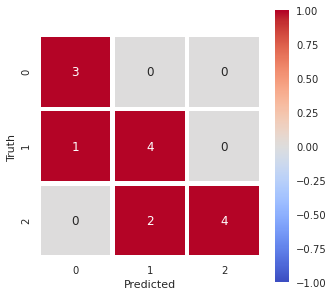

### 2. Random forest classifier<a href="#2.-Random-forest-classifier" class="anchor-link">¶</a>

In \[47\]:

    #Random forest classifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import classification_report
    rfc=RandomForestClassifier(n_estimators=50, random_state = 1)
    rfc.fit(x_train,y_train)

Out\[47\]:

    RandomForestClassifier(n_estimators=50, random_state=1)

#### Result :<a href="#Result-:" class="anchor-link">¶</a>

In \[48\]:

    rfc.score(x_test,y_test)

Out\[48\]:

    0.7142857142857143

In \[49\]:

    from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,classification_report
    rf=rfc.predict(x_test)
    print("Prediction accuracy results :")
    print(accuracy_score(y_test,rf))
    print(classification_report(y_test,rf))

    Prediction accuracy results :
    0.7142857142857143
                  precision    recall  f1-score   support

               0       0.50      1.00      0.67         3
               1       1.00      0.40      0.57         5
               2       0.83      0.83      0.83         6

        accuracy                           0.71        14
       macro avg       0.78      0.74      0.69        14
    weighted avg       0.82      0.71      0.70        14

In \[50\]:

    #model prediction result visualization with confusion matrix

    cm_1=confusion_matrix(y_test,rf)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidths=4,vmin=-1, vmax=1, center=0,
        cmap="coolwarm",square=True)
    plt.xlabel('Predicted')
    plt.ylabel('Truth')

Out\[50\]:

    Text(24.0, 0.5, 'Truth')

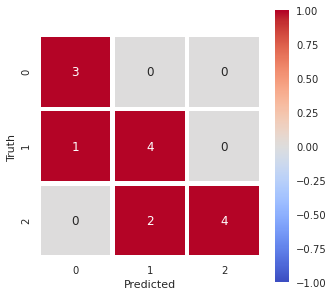

### 3. K-Nearest Neighbor(KNN)<a href="#3.-K-Nearest-Neighbor(KNN)" class="anchor-link">¶</a>

In \[51\]:

    from sklearn.neighbors import KNeighborsClassifier
    knn_c=KNeighborsClassifier()
    knn_c.fit(x_train,y_train)

Out\[51\]:

    KNeighborsClassifier()

In \[52\]:

    knn_c.score(x_test,y_test)

Out\[52\]:

    0.42857142857142855

In \[53\]:

    kn=knn_c.predict(x_test)
    print("Prediction accuracy results :")
    print(accuracy_score(y_test,kn)*100)
    print(classification_report(y_test,kn))

    Prediction accuracy results :
    42.857142857142854
                  precision    recall  f1-score   support

               0       0.40      0.67      0.50         3
               1       0.38      0.60      0.46         5
               2       1.00      0.17      0.29         6

        accuracy                           0.43        14
       macro avg       0.59      0.48      0.42        14
    weighted avg       0.65      0.43      0.39        14

### 4. DecisionTree<a href="#4.-DecisionTree" class="anchor-link">¶</a>

In \[54\]:

    from sklearn.tree import DecisionTreeClassifier

    # defining the decision tree model with depth of 4, you can tune it further to improve the accuracy score
    clf = DecisionTreeClassifier(max_depth=4, random_state=0)

    # fitting the decision tree model
    clf.fit(x_train,y_train)

Out\[54\]:

    DecisionTreeClassifier(max_depth=4, random_state=0)

In \[55\]:

    # making prediction on the validation set
    predict = clf.predict(x_test)

In \[56\]:

    from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,classification_report
    print("Prediction accuracy results :")
    # calculating the accuracy score
    print(accuracy_score(y_test, predict))
    print(classification_report(y_test,predict))

    Prediction accuracy results :
    0.5714285714285714
                  precision    recall  f1-score   support

               0       0.67      0.67      0.67         3
               1       0.50      0.20      0.29         5
               2       0.56      0.83      0.67         6

        accuracy                           0.57        14
       macro avg       0.57      0.57      0.54        14
    weighted avg       0.56      0.57      0.53        14

### 5. LogisticRegression<a href="#5.-LogisticRegression" class="anchor-link">¶</a>

In \[57\]:

    from sklearn.linear_model import LogisticRegression
    # defining the logistic regression model
    lreg = LogisticRegression()

    # fitting the model on  X_train and y_train
    lreg.fit(x_train,y_train)

Out\[57\]:

    LogisticRegression()

In \[58\]:

    # making prediction on the validation set
    prediction = lreg.predict(x_test)

In \[59\]:

    from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,classification_report
    print("Prediction accuracy results :")
    # calculating the accuracy score
    print(accuracy_score(y_test, prediction))
    print(classification_report(y_test,prediction))

    Prediction accuracy results :
    0.7857142857142857
                  precision    recall  f1-score   support

               0       1.00      1.00      1.00         3
               1       0.67      0.80      0.73         5
               2       0.80      0.67      0.73         6

        accuracy                           0.79        14
       macro avg       0.82      0.82      0.82        14
    weighted avg       0.80      0.79      0.79        14

### 6. Keras Deep Learning<a href="#6.-Keras-Deep-Learning" class="anchor-link">¶</a>

In \[60\]:

    #categorical conversion
    y_train = tf.keras.utils.to_categorical(y_train, 3)
    y_test = tf.keras.utils.to_categorical(y_test, 3)
    print(y_test.shape)
    print(y_train.shape)

    (14, 3)
    (41, 3)

In \[61\]:

    #Build and train the deep learning model
    from keras.models import Sequential
    from keras.wrappers.scikit_learn import KerasClassifier
    from keras.layers import Dense
    from keras.optimizers import Adam

    # define a function to build the keras model
    def create_model():
        # create model
        model= Sequential()
        
        #first hidden layer
        model.add(Dense(12, input_dim=x_train.shape[1], kernel_initializer='normal', activation='relu')) 
        
        #second hidden layer
        model.add(Dense(25, kernel_initializer='normal', activation='relu'))
        
        #third hidden layer
        model.add(Dense(8, kernel_initializer='normal', activation='relu'))
        
        #output layer
        model.add(Dense(3, activation='softmax'))
                  
                  
        # compile model
        model.compile(optimizer ='adam',loss='categorical_crossentropy',metrics=['accuracy'])
        return model
                  
    model = create_model()
    print(model.summary())

    Model: "sequential"
    _________________________________________________________________
    Layer (type)                 Output Shape              Param #   
    =================================================================
    dense (Dense)                (None, 12)                252       
    _________________________________________________________________
    dense_1 (Dense)              (None, 25)                325       
    _________________________________________________________________
    dense_2 (Dense)              (None, 8)                 208       
    _________________________________________________________________
    dense_3 (Dense)              (None, 3)                 27        
    =================================================================
    Total params: 812
    Trainable params: 812
    Non-trainable params: 0
    _________________________________________________________________
    None

In \[62\]:

    #model fitting
    model.fit(x_train, y_train, epochs=200, batch_size=30, verbose = 1)

    Epoch 1/200
    2/2 [==============================] - 0s 2ms/step - loss: 1.0990 - accuracy: 0.2439
    Epoch 2/200
    2/2 [==============================] - 0s 1ms/step - loss: 1.0973 - accuracy: 0.2683
    Epoch 3/200
    2/2 [==============================] - 0s 1ms/step - loss: 1.0964 - accuracy: 0.2927
    Epoch 4/200
    2/2 [==============================] - 0s 1ms/step - loss: 1.0955 - accuracy: 0.2439
    Epoch 5/200
    2/2 [==============================] - 0s 5ms/step - loss: 1.0946 - accuracy: 0.2683
    Epoch 6/200
    2/2 [==============================] - 0s 1ms/step - loss: 1.0936 - accuracy: 0.2927
    Epoch 7/200
    2/2 [==============================] - 0s 1ms/step - loss: 1.0923 - accuracy: 0.3902
    Epoch 8/200
    2/2 [==============================] - 0s 1ms/step - loss: 1.0910 - accuracy: 0.4390
    Epoch 9/200
    2/2 [==============================] - 0s 1ms/step - loss: 1.0895 - accuracy: 0.4878
    Epoch 10/200
    2/2 [==============================] - 0s 1ms/step - loss: 1.0879 - accuracy: 0.5366
    Epoch 11/200
    2/2 [==============================] - 0s 1ms/step - loss: 1.0860 - accuracy: 0.5366
    Epoch 12/200
    2/2 [==============================] - 0s 1ms/step - loss: 1.0841 - accuracy: 0.5610
    Epoch 13/200
    2/2 [==============================] - 0s 1ms/step - loss: 1.0822 - accuracy: 0.5366
    Epoch 14/200
    2/2 [==============================] - 0s 1ms/step - loss: 1.0800 - accuracy: 0.5366
    Epoch 15/200
    2/2 [==============================] - 0s 6ms/step - loss: 1.0776 - accuracy: 0.5366
    Epoch 16/200
    2/2 [==============================] - 0s 1ms/step - loss: 1.0750 - accuracy: 0.5366
    Epoch 17/200
    2/2 [==============================] - 0s 1ms/step - loss: 1.0720 - accuracy: 0.5366
    Epoch 18/200
    2/2 [==============================] - 0s 1ms/step - loss: 1.0689 - accuracy: 0.5366
    Epoch 19/200
    2/2 [==============================] - 0s 1ms/step - loss: 1.0656 - accuracy: 0.5366
    Epoch 20/200
    2/2 [==============================] - 0s 1ms/step - loss: 1.0621 - accuracy: 0.5610
    Epoch 21/200
    2/2 [==============================] - 0s 1ms/step - loss: 1.0582 - accuracy: 0.5610
    Epoch 22/200
    2/2 [==============================] - 0s 1ms/step - loss: 1.0538 - accuracy: 0.5610
    Epoch 23/200
    2/2 [==============================] - 0s 1ms/step - loss: 1.0490 - accuracy: 0.5610
    Epoch 24/200
    2/2 [==============================] - 0s 4ms/step - loss: 1.0437 - accuracy: 0.5610
    Epoch 25/200
    2/2 [==============================] - 0s 2ms/step - loss: 1.0381 - accuracy: 0.5610
    Epoch 26/200
    2/2 [==============================] - 0s 5ms/step - loss: 1.0319 - accuracy: 0.5610
    Epoch 27/200
    2/2 [==============================] - 0s 1ms/step - loss: 1.0252 - accuracy: 0.5610
    Epoch 28/200
    2/2 [==============================] - 0s 5ms/step - loss: 1.0176 - accuracy: 0.5610
    Epoch 29/200
    2/2 [==============================] - 0s 1ms/step - loss: 1.0101 - accuracy: 0.5610
    Epoch 30/200
    2/2 [==============================] - 0s 1ms/step - loss: 1.0016 - accuracy: 0.5610
    Epoch 31/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.9925 - accuracy: 0.5610
    Epoch 32/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.9827 - accuracy: 0.5610
    Epoch 33/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.9727 - accuracy: 0.5610
    Epoch 34/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.9615 - accuracy: 0.5610
    Epoch 35/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.9504 - accuracy: 0.5610
    Epoch 36/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.9385 - accuracy: 0.5610
    Epoch 37/200
    2/2 [==============================] - 0s 7ms/step - loss: 0.9265 - accuracy: 0.5610
    Epoch 38/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.9134 - accuracy: 0.5610
    Epoch 39/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.8999 - accuracy: 0.5610
    Epoch 40/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.8864 - accuracy: 0.5610
    Epoch 41/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.8731 - accuracy: 0.5610
    Epoch 42/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.8587 - accuracy: 0.5610
    Epoch 43/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.8439 - accuracy: 0.5610
    Epoch 44/200
    2/2 [==============================] - 0s 2ms/step - loss: 0.8290 - accuracy: 0.5610
    Epoch 45/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.8149 - accuracy: 0.5610
    Epoch 46/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.7998 - accuracy: 0.5610
    Epoch 47/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.7851 - accuracy: 0.5854
    Epoch 48/200
    2/2 [==============================] - 0s 4ms/step - loss: 0.7703 - accuracy: 0.5854
    Epoch 49/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.7563 - accuracy: 0.5854
    Epoch 50/200
    2/2 [==============================] - 0s 5ms/step - loss: 0.7416 - accuracy: 0.5854
    Epoch 51/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.7276 - accuracy: 0.5854
    Epoch 52/200
    2/2 [==============================] - 0s 5ms/step - loss: 0.7126 - accuracy: 0.5854
    Epoch 53/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.6992 - accuracy: 0.6098
    Epoch 54/200
    2/2 [==============================] - 0s 4ms/step - loss: 0.6850 - accuracy: 0.6098
    Epoch 55/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.6719 - accuracy: 0.6098
    Epoch 56/200
    2/2 [==============================] - 0s 5ms/step - loss: 0.6584 - accuracy: 0.6098
    Epoch 57/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.6460 - accuracy: 0.6098
    Epoch 58/200
    2/2 [==============================] - 0s 5ms/step - loss: 0.6325 - accuracy: 0.6098
    Epoch 59/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.6206 - accuracy: 0.6098
    Epoch 60/200
    2/2 [==============================] - 0s 6ms/step - loss: 0.6096 - accuracy: 0.6098
    Epoch 61/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.5978 - accuracy: 0.6098
    Epoch 62/200
    2/2 [==============================] - 0s 4ms/step - loss: 0.5857 - accuracy: 0.6098
    Epoch 63/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.5755 - accuracy: 0.6098
    Epoch 64/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.5640 - accuracy: 0.6098
    Epoch 65/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.5543 - accuracy: 0.6098
    Epoch 66/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.5441 - accuracy: 0.6098
    Epoch 67/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.5336 - accuracy: 0.6098
    Epoch 68/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.5243 - accuracy: 0.6098
    Epoch 69/200
    2/2 [==============================] - 0s 2ms/step - loss: 0.5147 - accuracy: 0.6098
    Epoch 70/200
    2/2 [==============================] - 0s 6ms/step - loss: 0.5054 - accuracy: 0.6341
    Epoch 71/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.4972 - accuracy: 0.7073
    Epoch 72/200
    2/2 [==============================] - 0s 2ms/step - loss: 0.4881 - accuracy: 0.7561
    Epoch 73/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.4797 - accuracy: 0.7805
    Epoch 74/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.4712 - accuracy: 0.7805
    Epoch 75/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.4628 - accuracy: 0.7805
    Epoch 76/200
    2/2 [==============================] - 0s 5ms/step - loss: 0.4550 - accuracy: 0.8049
    Epoch 77/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.4476 - accuracy: 0.8293
    Epoch 78/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.4402 - accuracy: 0.8780
    Epoch 79/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.4322 - accuracy: 0.9512
    Epoch 80/200
    2/2 [==============================] - 0s 7ms/step - loss: 0.4250 - accuracy: 0.9756
    Epoch 81/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.4179 - accuracy: 0.9756
    Epoch 82/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.4107 - accuracy: 0.9756
    Epoch 83/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.4043 - accuracy: 0.9756
    Epoch 84/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.3971 - accuracy: 0.9756
    Epoch 85/200
    2/2 [==============================] - 0s 4ms/step - loss: 0.3903 - accuracy: 0.9756
    Epoch 86/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.3832 - accuracy: 0.9756
    Epoch 87/200
    2/2 [==============================] - 0s 5ms/step - loss: 0.3763 - accuracy: 0.9756
    Epoch 88/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.3699 - accuracy: 0.9756
    Epoch 89/200
    2/2 [==============================] - 0s 5ms/step - loss: 0.3629 - accuracy: 0.9756
    Epoch 90/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.3561 - accuracy: 0.9756
    Epoch 91/200
    2/2 [==============================] - 0s 5ms/step - loss: 0.3492 - accuracy: 0.9756
    Epoch 92/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.3423 - accuracy: 0.9756
    Epoch 93/200
    2/2 [==============================] - 0s 5ms/step - loss: 0.3346 - accuracy: 0.9756
    Epoch 94/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.3267 - accuracy: 0.9756
    Epoch 95/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.3191 - accuracy: 0.9756
    Epoch 96/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.3121 - accuracy: 0.9756
    Epoch 97/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.3042 - accuracy: 0.9756
    Epoch 98/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.2974 - accuracy: 0.9756
    Epoch 99/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.2894 - accuracy: 0.9756
    Epoch 100/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.2803 - accuracy: 0.9756
    Epoch 101/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.2709 - accuracy: 0.9756
    Epoch 102/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.2622 - accuracy: 0.9756
    Epoch 103/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.2529 - accuracy: 0.9756
    Epoch 104/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.2443 - accuracy: 0.9756
    Epoch 105/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.2365 - accuracy: 1.0000
    Epoch 106/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.2277 - accuracy: 1.0000
    Epoch 107/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.2205 - accuracy: 1.0000
    Epoch 108/200
    2/2 [==============================] - 0s 4ms/step - loss: 0.2133 - accuracy: 1.0000
    Epoch 109/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.2060 - accuracy: 1.0000
    Epoch 110/200
    2/2 [==============================] - 0s 6ms/step - loss: 0.1989 - accuracy: 1.0000
    Epoch 111/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.1924 - accuracy: 1.0000
    Epoch 112/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.1855 - accuracy: 1.0000
    Epoch 113/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.1791 - accuracy: 1.0000
    Epoch 114/200
    2/2 [==============================] - 0s 4ms/step - loss: 0.1725 - accuracy: 1.0000
    Epoch 115/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.1666 - accuracy: 1.0000
    Epoch 116/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.1598 - accuracy: 1.0000
    Epoch 117/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.1540 - accuracy: 1.0000
    Epoch 118/200
    2/2 [==============================] - 0s 7ms/step - loss: 0.1478 - accuracy: 1.0000
    Epoch 119/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.1420 - accuracy: 1.0000
    Epoch 120/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.1362 - accuracy: 1.0000
    Epoch 121/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.1304 - accuracy: 1.0000
    Epoch 122/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.1246 - accuracy: 1.0000
    Epoch 123/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.1196 - accuracy: 1.0000
    Epoch 124/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.1144 - accuracy: 1.0000
    Epoch 125/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.1092 - accuracy: 1.0000
    Epoch 126/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.1043 - accuracy: 1.0000
    Epoch 127/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.0999 - accuracy: 1.0000
    Epoch 128/200
    2/2 [==============================] - 0s 7ms/step - loss: 0.0954 - accuracy: 1.0000
    Epoch 129/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.0910 - accuracy: 1.0000
    Epoch 130/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.0867 - accuracy: 1.0000
    Epoch 131/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.0830 - accuracy: 1.0000
    Epoch 132/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.0792 - accuracy: 1.0000
    Epoch 133/200
    2/2 [==============================] - 0s 5ms/step - loss: 0.0758 - accuracy: 1.0000
    Epoch 134/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.0724 - accuracy: 1.0000
    Epoch 135/200
    2/2 [==============================] - 0s 5ms/step - loss: 0.0694 - accuracy: 1.0000
    Epoch 136/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.0662 - accuracy: 1.0000
    Epoch 137/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.0633 - accuracy: 1.0000
    Epoch 138/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.0606 - accuracy: 1.0000
    Epoch 139/200
    2/2 [==============================] - 0s 4ms/step - loss: 0.0582 - accuracy: 1.0000
    Epoch 140/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.0556 - accuracy: 1.0000
    Epoch 141/200
    2/2 [==============================] - 0s 6ms/step - loss: 0.0534 - accuracy: 1.0000
    Epoch 142/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.0513 - accuracy: 1.0000
    Epoch 143/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.0493 - accuracy: 1.0000
    Epoch 144/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.0474 - accuracy: 1.0000
    Epoch 145/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.0456 - accuracy: 1.0000
    Epoch 146/200
    2/2 [==============================] - 0s 5ms/step - loss: 0.0438 - accuracy: 1.0000
    Epoch 147/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.0422 - accuracy: 1.0000
    Epoch 148/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.0407 - accuracy: 1.0000
    Epoch 149/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.0390 - accuracy: 1.0000
    Epoch 150/200
    2/2 [==============================] - 0s 5ms/step - loss: 0.0378 - accuracy: 1.0000
    Epoch 151/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.0365 - accuracy: 1.0000
    Epoch 152/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.0351 - accuracy: 1.0000
    Epoch 153/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.0337 - accuracy: 1.0000
    Epoch 154/200
    2/2 [==============================] - 0s 7ms/step - loss: 0.0326 - accuracy: 1.0000
    Epoch 155/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.0314 - accuracy: 1.0000
    Epoch 156/200
    2/2 [==============================] - 0s 5ms/step - loss: 0.0304 - accuracy: 1.0000
    Epoch 157/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.0294 - accuracy: 1.0000
    Epoch 158/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.0284 - accuracy: 1.0000
    Epoch 159/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.0274 - accuracy: 1.0000
    Epoch 160/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.0265 - accuracy: 1.0000
    Epoch 161/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.0256 - accuracy: 1.0000
    Epoch 162/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.0248 - accuracy: 1.0000
    Epoch 163/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.0240 - accuracy: 1.0000
    Epoch 164/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.0233 - accuracy: 1.0000
    Epoch 165/200
    2/2 [==============================] - 0s 5ms/step - loss: 0.0226 - accuracy: 1.0000
    Epoch 166/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.0219 - accuracy: 1.0000
    Epoch 167/200
    2/2 [==============================] - 0s 6ms/step - loss: 0.0212 - accuracy: 1.0000
    Epoch 168/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.0205 - accuracy: 1.0000
    Epoch 169/200
    2/2 [==============================] - 0s 5ms/step - loss: 0.0200 - accuracy: 1.0000
    Epoch 170/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.0194 - accuracy: 1.0000
    Epoch 171/200
    2/2 [==============================] - 0s 5ms/step - loss: 0.0188 - accuracy: 1.0000
    Epoch 172/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.0183 - accuracy: 1.0000
    Epoch 173/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.0178 - accuracy: 1.0000
    Epoch 174/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.0174 - accuracy: 1.0000
    Epoch 175/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.0169 - accuracy: 1.0000
    Epoch 176/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.0165 - accuracy: 1.0000
    Epoch 177/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.0160 - accuracy: 1.0000
    Epoch 178/200
    2/2 [==============================] - 0s 5ms/step - loss: 0.0156 - accuracy: 1.0000
    Epoch 179/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.0153 - accuracy: 1.0000
    Epoch 180/200
    2/2 [==============================] - 0s 5ms/step - loss: 0.0148 - accuracy: 1.0000
    Epoch 181/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.0145 - accuracy: 1.0000
    Epoch 182/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.0142 - accuracy: 1.0000
    Epoch 183/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.0138 - accuracy: 1.0000
    Epoch 184/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.0135 - accuracy: 1.0000
    Epoch 185/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.0132 - accuracy: 1.0000
    Epoch 186/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.0129 - accuracy: 1.0000
    Epoch 187/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.0126 - accuracy: 1.0000
    Epoch 188/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.0123 - accuracy: 1.0000
    Epoch 189/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.0120 - accuracy: 1.0000
    Epoch 190/200
    2/2 [==============================] - 0s 4ms/step - loss: 0.0118 - accuracy: 1.0000
    Epoch 191/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.0115 - accuracy: 1.0000
    Epoch 192/200
    2/2 [==============================] - 0s 6ms/step - loss: 0.0113 - accuracy: 1.0000
    Epoch 193/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.0111 - accuracy: 1.0000
    Epoch 194/200
    2/2 [==============================] - 0s 6ms/step - loss: 0.0108 - accuracy: 1.0000
    Epoch 195/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.0106 - accuracy: 1.0000
    Epoch 196/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.0104 - accuracy: 1.0000
    Epoch 197/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.0102 - accuracy: 1.0000
    Epoch 198/200
    2/2 [==============================] - 0s 2ms/step - loss: 0.0100 - accuracy: 1.0000
    Epoch 199/200
    2/2 [==============================] - 0s 5ms/step - loss: 0.0098 - accuracy: 1.0000
    Epoch 200/200
    2/2 [==============================] - 0s 1ms/step - loss: 0.0095 - accuracy: 1.0000

Out\[62\]:

    <tensorflow.python.keras.callbacks.History at 0x7f45c7877c90>

#### Result :<a href="#Result-:" class="anchor-link">¶</a>

In \[63\]:

    # generate classification report using predictions for categorical model
    from sklearn.metrics import classification_report, accuracy_score

    kdl=np.round(model.predict(x_test)).astype(int)

    print("Prediction accuracy results :")
    print(accuracy_score(y_test,kdl)*100)
    print(classification_report(y_test,kdl))

    Prediction accuracy results :
    78.57142857142857
                  precision    recall  f1-score   support

               0       1.00      0.67      0.80         3
               1       0.62      1.00      0.77         5
               2       1.00      0.67      0.80         6

       micro avg       0.79      0.79      0.79        14
       macro avg       0.88      0.78      0.79        14
    weighted avg       0.87      0.79      0.79        14
     samples avg       0.79      0.79      0.79        14

In \[ \]: